In [12]:
#PREPROCESS STEP
#using handling missing data, encoding categorical variables, and scaling numerical features.


import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

# USING FUNCTION TO HANDLE_OUTLIERS
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df




# DATASET
df = pd.read_csv(r"C:\Users\nh013\Desktop\TELECOM CHURN DATASET\telco.csv")


# REPLACE EMTY STRING WITH NUN AND DROP ROWS WITH MISSING VALUES
df = df.replace(' ', pd.NA)
df.dropna(inplace=True)

#DROP UNNEED COLUMN
df = df.drop(['customerID'], axis=1)


# SELECT NUMERICAL COLUMN
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# IMPUTE MISSING VALUES USING KNN IMPUTATION
imputer = KNNImputer(n_neighbors=5)
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# IDENTIFYING MISSING VALUES
print(df.isnull().sum())

# DDROP MISSING VALUES
df.dropna(inplace=True)


#FILL MISSING VALUES WITH MEAN AND MODE
mean = df.mean()
df.fillna(mean, inplace=True)
mode = df.mode().iloc[0]
df.fillna(mode, inplace=True)

#FILL MISSING VALUES WITH FORWARD FILL AND BACKWARDFILL
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)


# CONVERT CATEGORICAL VALUE TO NUMERICAL
categorical_cols = ['Churn','gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])
    
    
# ONE HOT ENCODING
df_encoded = pd.get_dummies(df, columns=categorical_cols)    
    
# HANDLE OUTLIERS
df_encoded = handle_outliers(df,'Churn')


# REMOVE DUBLICATE ROWS
df.drop_duplicates(inplace=True)


# NORMALIZE AND SCALING ALL NUMERICAL COLUMN

scaler = MinMaxScaler()
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

scaler = StandardScaler()
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])



print(df)
print(df.shape[0])

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


C:\Users\nh013\AppData\Local\Temp\ipykernel_13016\1730921578.py:45: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = df.mean()


        gender  SeniorCitizen   Partner  Dependents    tenure  PhoneService  \
0    -1.008596      -0.440921  1.032482   -0.653764 -1.285566     -3.051036   
1     0.991477      -0.440921 -0.968540   -0.653764  0.060346      0.327757   
2     0.991477      -0.440921 -0.968540   -0.653764 -1.244781      0.327757   
3     0.991477      -0.440921 -0.968540   -0.653764  0.508983     -3.051036   
4    -1.008596      -0.440921 -0.968540   -0.653764 -1.244781      0.327757   
...        ...            ...       ...         ...       ...           ...   
7038  0.991477      -0.440921  1.032482    1.529603 -0.347506      0.327757   
7039 -1.008596      -0.440921  1.032482    1.529603  1.610184      0.327757   
7040 -1.008596      -0.440921  1.032482    1.529603 -0.877714     -3.051036   
7041  0.991477       2.267980  1.032482   -0.653764 -1.163210      0.327757   
7042  0.991477      -0.440921 -0.968540   -0.653764  1.365473      0.327757   

      MultipleLines  InternetService  OnlineSecurit

In [1]:
# FIND CORRELATION MATRIX

import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

# USING FUNCTION TO HANDLE_OUTLIERS
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df




# DATASET
df = pd.read_csv(r"C:\Users\nh013\Desktop\TELECOM CHURN DATASET\telco.csv")


# REPLACE EMTY STRING WITH NUN AND DROP ROWS WITH MISSING VALUES
df = df.replace(' ', pd.NA)
df.dropna(inplace=True)


# SELECT NUMERICAL COLUMN
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# IMPUTE MISSING VALUES USING KNN IMPUTATION
imputer = KNNImputer(n_neighbors=5)
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# IDENTIFYING MISSING VALUES
print(df.isnull().sum())

# DDROP MISSING VALUES
df.dropna(inplace=True)


#FILL MISSING VALUES WITH MEAN AND MODE
mean = df.mean()
df.fillna(mean, inplace=True)
mode = df.mode().iloc[0]
df.fillna(mode, inplace=True)

#FILL MISSING VALUES WITH FORWARD FILL AND BACKWARDFILL
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)

#DROP UNNEED COLUMN
df = df.drop(['customerID'], axis=1)



# CONVERT CATEGORICAL VALUE TO NUMERICAL
categorical_cols = ['Churn','gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])
    
    
# ONE HOT ENCODING
df_encoded = pd.get_dummies(df, columns=categorical_cols)    

# CALCULATE CORRELATION MATRIX
correlation_matrix = df_encoded.corr()


# HANDLE OUTLIERS
df_encoded = handle_outliers(df,'Churn')


# REMOVE DUBLICATE ROWS
df.drop_duplicates(inplace=True)


# NORMALIZE AND SCALING ALL NUMERICAL COLUMN

scaler = MinMaxScaler()
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

scaler = StandardScaler()
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])



print(df)
print(df.shape[0])
print(correlation_matrix)


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


C:\Users\nh013\AppData\Local\Temp\ipykernel_2660\3511030314.py:42: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = df.mean()


        gender  SeniorCitizen   Partner  Dependents    tenure  PhoneService  \
0    -1.008596      -0.440921  1.032482   -0.653764 -1.285566     -3.051036   
1     0.991477      -0.440921 -0.968540   -0.653764  0.060346      0.327757   
2     0.991477      -0.440921 -0.968540   -0.653764 -1.244781      0.327757   
3     0.991477      -0.440921 -0.968540   -0.653764  0.508983     -3.051036   
4    -1.008596      -0.440921 -0.968540   -0.653764 -1.244781      0.327757   
...        ...            ...       ...         ...       ...           ...   
7038  0.991477      -0.440921  1.032482    1.529603 -0.347506      0.327757   
7039 -1.008596      -0.440921  1.032482    1.529603  1.610184      0.327757   
7040 -1.008596      -0.440921  1.032482    1.529603 -0.877714     -3.051036   
7041  0.991477       2.267980  1.032482   -0.653764 -1.163210      0.327757   
7042  0.991477      -0.440921 -0.968540   -0.653764  1.365473      0.327757   

      MultipleLines  InternetService  OnlineSecurit

In [2]:
#VISUALIZE CORRELATION MATRICS USING PLOTLY

import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
import plotly.express as px

# USING FUNCTION TO HANDLE OUTLIERS
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# DATASET
df = pd.read_csv(r"C:\Users\nh013\Desktop\TELECOM CHURN DATASET\telco.csv")

# REPLACE EMPTY STRING WITH NaN AND DROP ROWS WITH MISSING VALUES
df = df.replace(' ', pd.NA)
df.dropna(inplace=True)

# SELECT NUMERICAL COLUMNS
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# IMPUTE MISSING VALUES USING KNN IMPUTATION
imputer = KNNImputer(n_neighbors=5)
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# DROP UNNEEDED COLUMN
df = df.drop(['customerID'], axis=1)

# CONVERT CATEGORICAL VALUES TO NUMERICAL
categorical_cols = ['Churn','gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# ONE HOT ENCODING
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# CALCULATE CORRELATION MATRIX
correlation_matrix = df_encoded.corr()

# HANDLE OUTLIERS
df_encoded = handle_outliers(df,'Churn')

# REMOVE DUPLICATE ROWS
df.drop_duplicates(inplace=True)

# NORMALIZE AND SCALE ALL NUMERICAL COLUMNS
scaler = MinMaxScaler()
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

scaler = StandardScaler()
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# CREATE CORRELATION MATRIX PLOT USING PLOTLY
fig = px.imshow(correlation_matrix,
                labels=dict(x="Features", y="Features"),
                x=correlation_matrix.columns,
                y=correlation_matrix.columns,
                color_continuous_scale='RdBu',
                title="Correlation Matrix")

fig.update_layout(width=800, height=800)
fig.show()




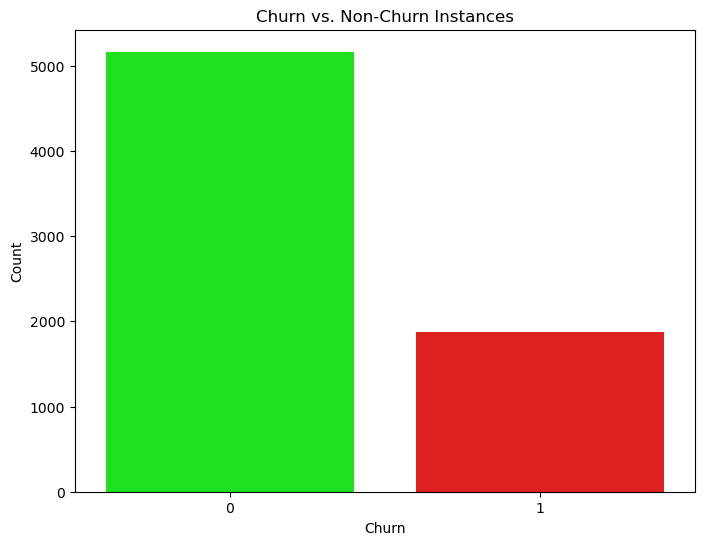

In [3]:
# VISUALIZE CHURN AND NON CHURN USING PLOTLY


import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# USING FUNCTION TO HANDLE OUTLIERS
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# DATASET
df = pd.read_csv(r"C:\Users\nh013\Desktop\TELECOM CHURN DATASET\telco.csv")

# REPLACE EMPTY STRING WITH NaN AND DROP ROWS WITH MISSING VALUES
df = df.replace(' ', pd.NA)
df.dropna(inplace=True)

# SELECT NUMERICAL COLUMNS
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# IMPUTE MISSING VALUES USING KNN IMPUTATION
imputer = KNNImputer(n_neighbors=5)
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# DROP UNNEEDED COLUMN
df = df.drop(['customerID'], axis=1)

# CONVERT CATEGORICAL VALUES TO NUMERICAL
categorical_cols = ['Churn','gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# ONE HOT ENCODING
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# CALCULATE CORRELATION MATRIX
correlation_matrix = df_encoded.corr()

# HANDLE OUTLIERS
df_encoded = handle_outliers(df, 'Churn')

# REMOVE DUPLICATE ROWS
df.drop_duplicates(inplace=True)

# NORMALIZE AND SCALE ALL NUMERICAL COLUMNS
scaler = MinMaxScaler()
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

scaler = StandardScaler()
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# DEFINE COLOR
churn_color = '#FF0000'  # RED COLOR FOR CHURN
non_churn_color = '#00FF00'  # GREEN COLOR FOR NON CHURN

# PLOT
plt.figure(figsize=(8, 6))
sns.countplot(data=df_encoded, x='Churn', palette={1: churn_color, 0: non_churn_color})
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn vs. Non-Churn Instances')
plt.show()
